Project Title: Titanic Survival Predicton

Problem Statement:  The Titanic dataset contains information about passengers and their fate during this tragic event. The goal of this data science project is to build a predictive model that can accurately determine whether a passenger survived or not based on a set of features.

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score 
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC 
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.neighbors import KNeighborsClassifier 
import warnings as wam 
from warnings import filterwarnings

filterwarnings("ignore")

In [3]:
df=pd.read_csv(r"C:\Users\Ajitha V\OneDrive\Desktop\Task 1\tested.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


Exploratory Data Analysis

0= dead, 1=alive

1=firstclass, 2=2nd class, 3= 3rd class

The "Embarked"indicates the port where passengers got on board the Titanic. Here's what each value represents:

C = Cherbourg: A city in northern France.

Q = Queenstown (now known as Cobh): A town in County Cork, Ireland.

S = Southampton: A city on the south coast of England.

Data Preprocessing

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
def summary(df):
    sum = pd.DataFrame(df.dtypes, columns=['dtypes'])
    sum['missing#'] = df.isna().sum().values
    sum['missing%'] = (df.isna().sum().values*100)/len(df)
    sum['uniques'] = df.nunique().values                
    sum['count'] = df.count().values
    #ston ['skew'] = dfskew().values
    desc = pd. DataFrame(df.describe().T)
    sum['min'] = desc['min']
    sum['max'] = desc['max']
    sum['mean'] = desc['mean']
    return sum

summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,86,20.574163,79,332,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,1,0.239234,169,417,0.000000,512.329200,35.627188


In [6]:
df.shape

(418, 12)

We drop the cabin values since it has a lot of null values


In [7]:
df.drop(columns= ['Cabin'], inplace=True)

In [8]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,86,20.574163,79,332,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,1,0.239234,169,417,0.000000,512.329200,35.627188


We use fillna method to fill the null values in Fare and Age columns using mean fill

In [9]:
df['Age'].fillna(df['Age'].mean(),inplace=True)


In [10]:
df['Fare'].fillna(df['Fare'].mean(),inplace=True)


In [11]:
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,0,0.000000,80,418,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Ticket,object,0,0.000000,363,418,nan,nan,nan
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188


In [12]:
df['Ticket'].sample(10)

346    237670
88     364856
169      7548
387    244346
74     113503
402    112378
275    236853
1      363272
132      4133
157    347469
Name: Ticket, dtype: object

In [13]:
df.drop(columns=['Ticket'],inplace=True)

In [14]:
#Also drop the ticket column
summary(df).style.background_gradient(cmap='twilight_shifted_r')

,dtypes,missing#,missing%,uniques,count,min,max,mean
PassengerId,int64,0,0.000000,418,418,892.000000,1309.000000,1100.500000
Survived,int64,0,0.000000,2,418,0.000000,1.000000,0.363636
Pclass,int64,0,0.000000,3,418,1.000000,3.000000,2.265550
Name,object,0,0.000000,418,418,nan,nan,nan
Sex,object,0,0.000000,2,418,nan,nan,nan
Age,float64,0,0.000000,80,418,0.170000,76.000000,30.272590
SibSp,int64,0,0.000000,7,418,0.000000,8.000000,0.447368
Parch,int64,0,0.000000,8,418,0.000000,9.000000,0.392344
Fare,float64,0,0.000000,170,418,0.000000,512.329200,35.627188
Embarked,object,0,0.000000,3,418,nan,nan,nan


(EDA)Data Exploration

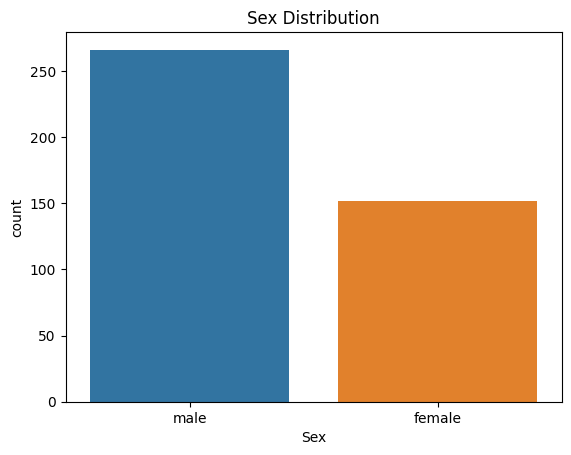

In [15]:
sns.countplot(x ='Sex',data=df)
plt.title('Sex Distribution')
plt.show()

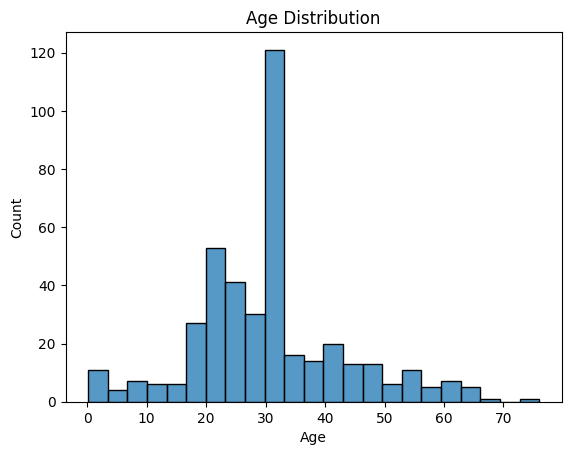

In [16]:
sns.histplot(df['Age'])
plt.title('Age Distribution')
plt.show()

<AxesSubplot: xlabel='Embarked', ylabel='count'>

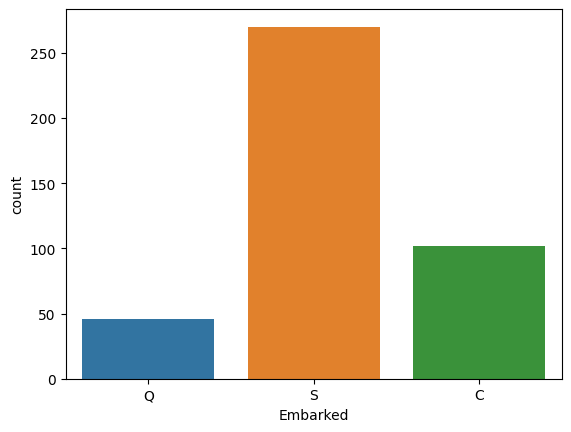

In [17]:
sns.countplot(x=df['Embarked'])

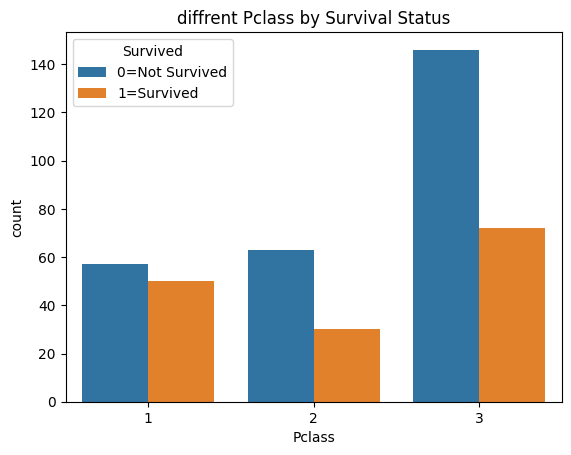

In [18]:
sns.countplot(x='Pclass',data=df,hue='Survived')
legend_labels = {0: 'Not Survived', 1: 'Survived'}
plt.legend(title ='Survived', labels=[f"{key}={value}" for key, value in legend_labels.items()])
plt.title('diffrent Pclass by Survival Status')
plt.show()

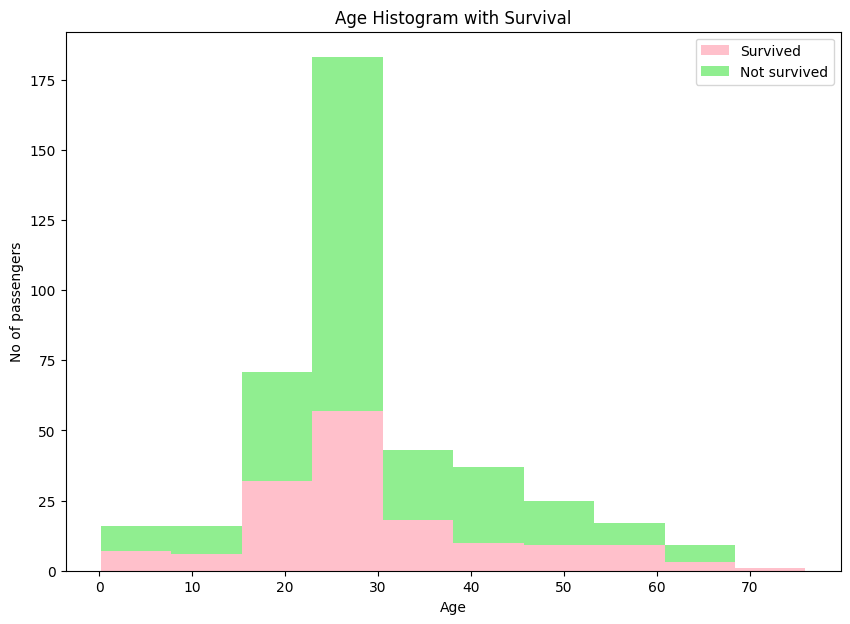

In [19]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 7))
plt.hist(x=[df[df['Survived']== 1][ 'Age'], df[df['Survived']==0]['Age']], stacked=True, color = ['pink','lightgreen'],label=['Survived', 'Not survived'])
plt.title('Age Histogram with Survival')
plt.xlabel('Age')
plt.ylabel('No of passengers')
plt.legend()

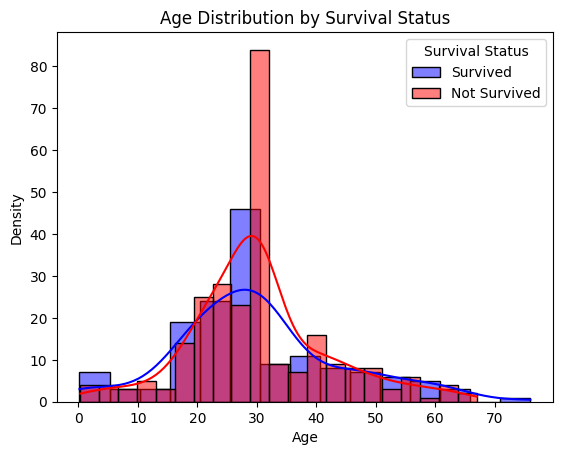

In [20]:
#Create a distribution plot for passengers who survived
sns.histplot(data=df [df ['Survived'] == 1], x='Age', kde=True, color='blue', label='Survived')

# Create a distribution plot for passengers who did not survive.
sns.histplot(data=df[df['Survived']== 0], x='Age', kde=True, color='red', label='Not Survived')

# Set plot labels and title 
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Survival Status')

# Add a legend
plt.legend (title ='Survival Status')

plt.show()

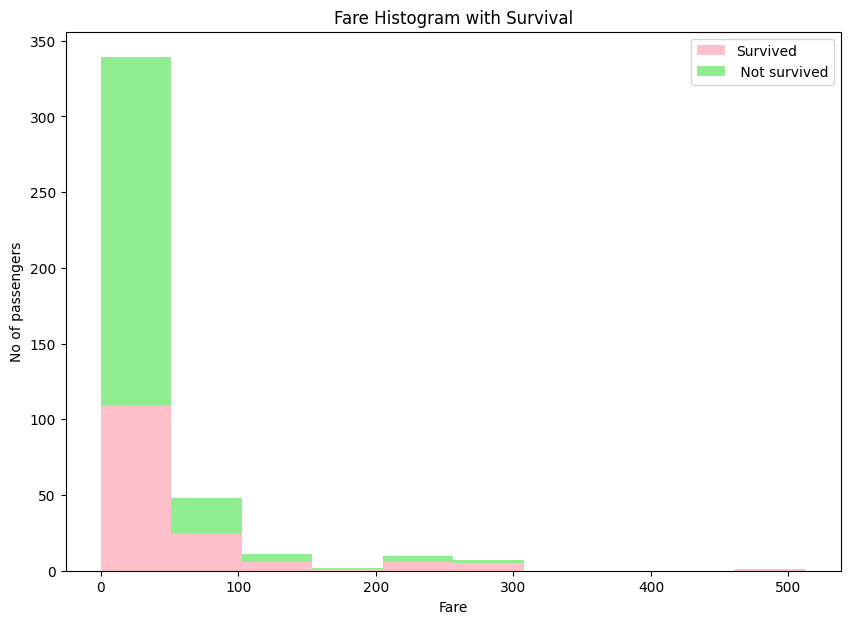

In [21]:
fig = plt.figure(figsize = (10, 7))
plt.hist (x = [df[df['Survived']== 1]['Fare'], df[df['Survived']==0]['Fare']], stacked=True, color = ['pink','lightgreen'],label = ['Survived',' Not survived'])
plt.title('Fare Histogram with Survival')
plt.xlabel('Fare')
plt.ylabel('No of passengers')
plt.legend()

<AxesSubplot: xlabel='Embarked', ylabel='count'>

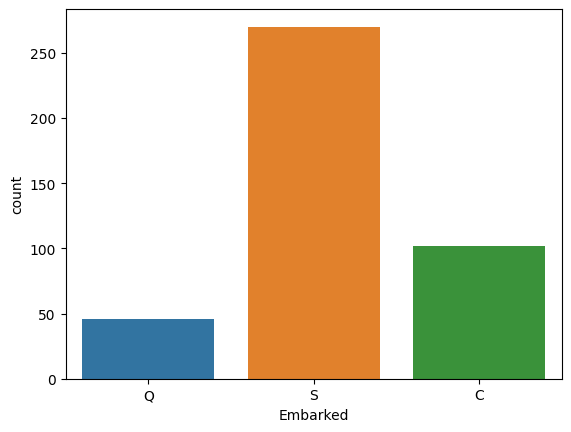

In [22]:
sns.countplot(x=df['Embarked'])

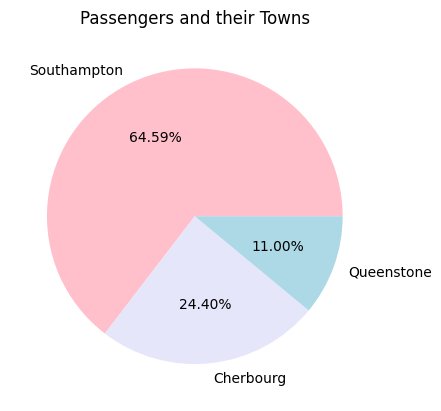

In [23]:
plt.figsize=(8,8)
plt.title("Passengers and their Towns")
#shadow= True
plt.pie(df['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstone'],autopct='%1.02f%%',colors=['pink','lavender','lightblue'])
plt.show()

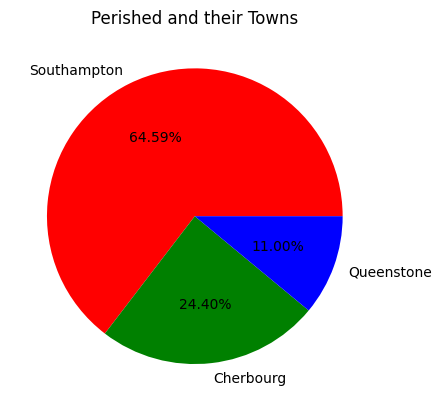

In [24]:
plt.figsize=(8,8)
plt.title("Perished and their Towns")
explode = (0,0.1,0)
#shadow= True
plt.pie(df['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstone'],autopct='%1.02f%%',colors=['red','green','blue'])
plt.show()

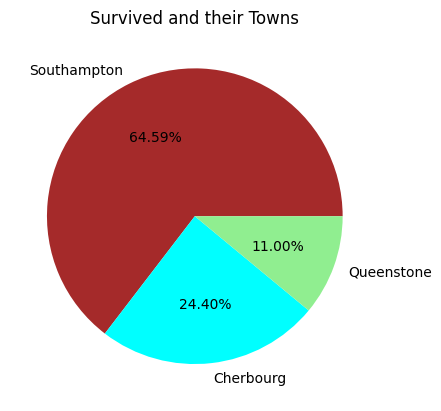

In [25]:
plt.figsize=(8,8)
plt.title("Survived and their Towns")
explode=(0,0.1,0)
#shadow= True
plt.pie(df['Embarked'].value_counts(),labels=['Southampton','Cherbourg','Queenstone'],autopct='%1.02f%%',colors=['brown','aqua','lightgreen'])
plt.show()

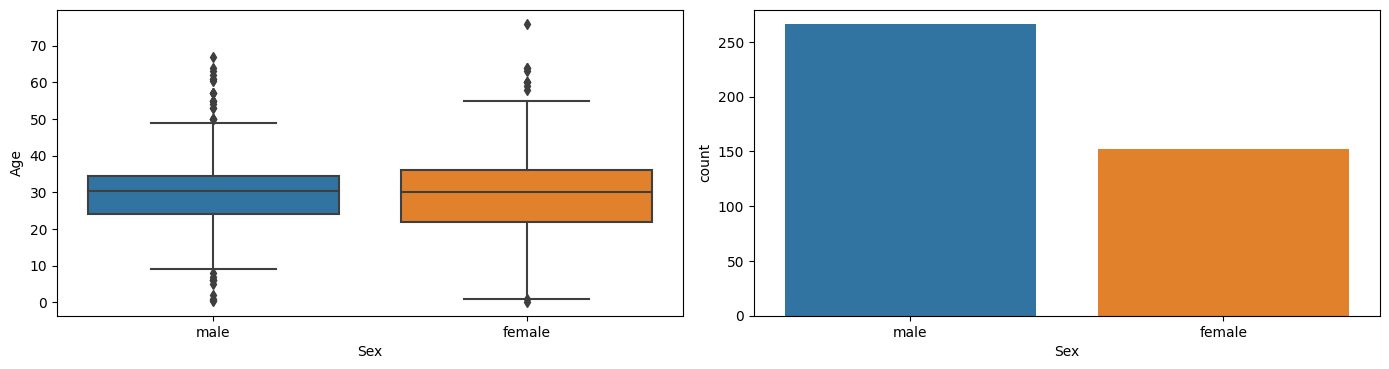

In [28]:
plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
sns.boxplot(x='Sex',y='Age',data=df)

plt.subplot(2,2,2)
sns.countplot(x='Sex',data=df)

plt.tight_layout()
plt.show()



<Figure size 1400x700 with 0 Axes>

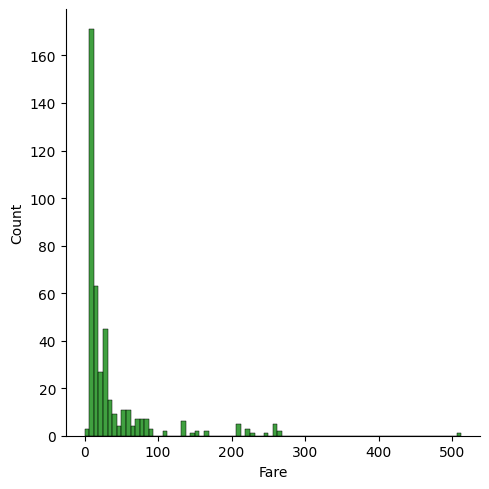

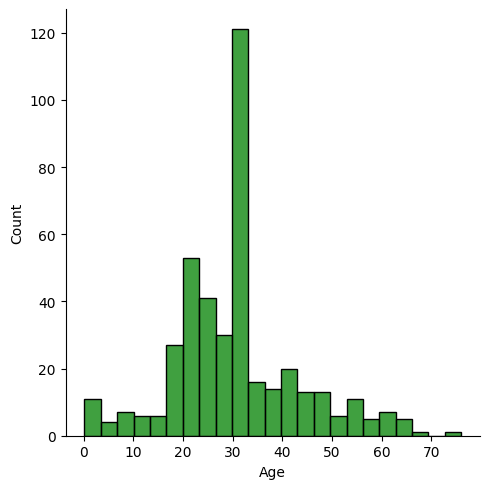

In [30]:
plt.figure(figsize=(14,7))
sns.displot(df['Fare'],color='g')
plt.show()

sns.displot(df['Age'],color='g')
plt.show()

<AxesSubplot: xlabel='SibSp', ylabel='count'>

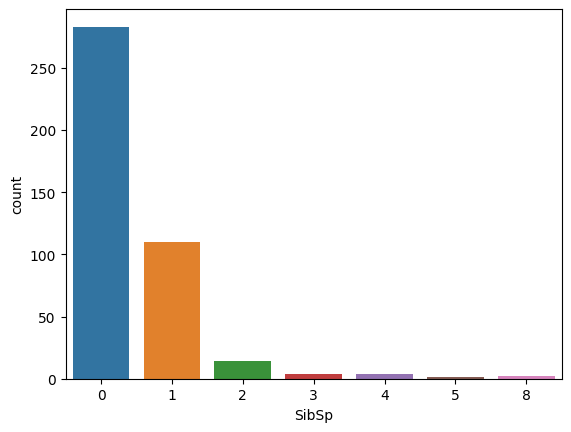

In [31]:
sns.countplot(x='SibSp',data=df)

<AxesSubplot: xlabel='Pclass', ylabel='Age'>

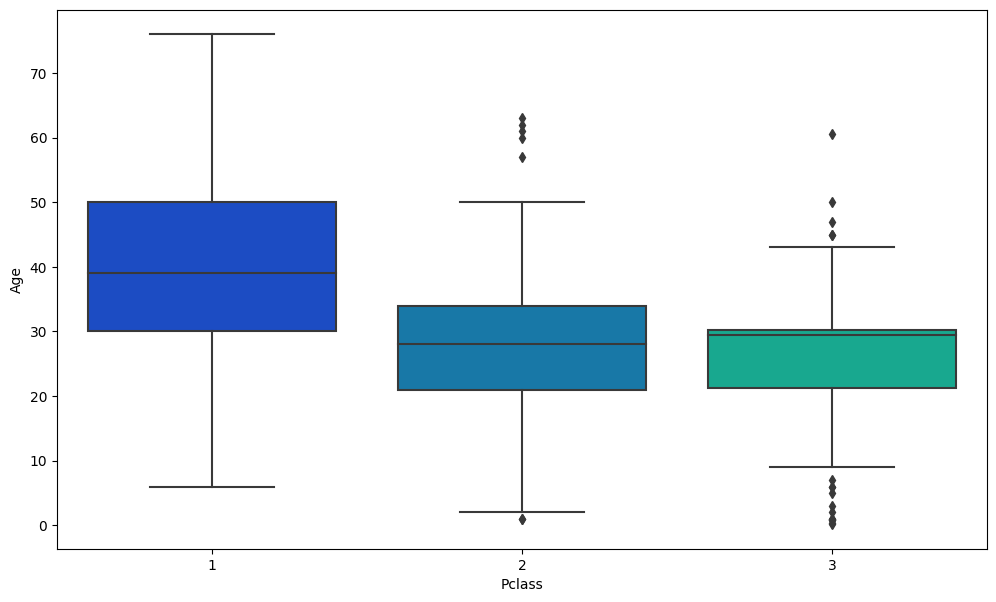

In [32]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df, palette='winter')    

CHANGE DATA TYPES OF COLUMN

In [33]:
df['Age']=df['Age'].astype(int)
df['Fare']=df['Fare'].astype(int)

In [34]:
#assign values to object dictionary
df['Embarked']=df['Embarked'].map({'Q':0,'S':1,'C':2}).astype(int)
df['Sex']=df['Sex'].map({'female':1,'male':0}).astype(int)

In [35]:
#drop columns for using dataset
dfn=df.drop(['PassengerId','Name'],axis=1,inplace=True)

Model Building

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [37]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,34,0,0,7,0
1,1,3,1,47,1,0,7,1
2,0,2,0,62,0,0,9,0
3,0,3,0,27,0,0,8,1
4,1,3,1,22,1,1,12,1


Decision Tree Accuracy

In [38]:
x=df.drop(['Survived'],axis=1)
y=df['Survived']
X_train,X_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=40)
clf=DecisionTreeClassifier()
clf.fit(X_train,y_train)

DecisionTreeClassifier()

In [39]:
from sklearn.metrics import accuracy_score
#prediction on test  data
y_pred=clf.predict(X_test)
#calculation
acc=accuracy_score(y_test,y_pred)
print("Accuracy:",acc)

Accuracy: 1.0


Logistic Regression Accuracy

In [40]:
LR= LogisticRegression(solver='liblinear',max_iter=200)
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
LRAcc=accuracy_score(y_pred,y_test)
print("Logistic Regression Accuracy: {:.2f}%".format(LRAcc*100))

Logistic Regression Accuracy: 100.00%


Each model Accuracy

In [41]:
models={
    'LogisticRegression':LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Neural Network':MLPClassifier(max_iter=1000)
}

In [52]:
#train and evaluate each model
for model_name,model in models.items():
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    report=classification_report(y_test,y_pred)#compute classification report
    print(f'{model_name} - Accuracy: {accuracy:.2f}')
    print(f'Classification Report:\n{report}\n')


LogisticRegression - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Decision Tree - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Random Forest - Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        31

    accuracy 